In [ ]:
"""
planning:
- load the detectron faster rcnn model and perform detections on a single image
- chosen model faster rcnn R50 C4 x1
- after i have the detection i should use them for the classification
- after i have images to use for the classification i should use the alexnet model to classify them.
- after that save the results
"""

In [1]:
# load the detectron model
import numpy as np
import os

# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()


# checking the version and if we have cuda available
from src.segmentation.framework_handlers.detectron2_handler import print_version_info

!nvcc --version
print_version_info()

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Apr_17_19:19:55_PDT_2024
Cuda compilation tools, release 12.5, V12.5.40
Build cuda_12.5.r12.5/compiler.34177558_0
torch:  2.3 ; cuda:  12.1
detectron2: 0.6


In [2]:
import time
# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

model_config = {
    "model_name": "faster_rcnn_R_50_C4_1x",
    "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth",
    "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml"
}

In [3]:
model_path = model_config['checkpoint']
config_path = model_config['yaml_file']
detection_model = AutoDetectionModel.from_pretrained(
    model_type='detectron2',
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.5,
    image_size=512,
    device="cuda:0", # or 'cpu'
)

07/13/2024 16:58:45 - WARNING - fvcore.common.config -   Loading config /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml not available in Model Zoo!
[07/13 16:58:46 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth ...


07/13/2024 16:58:46 - INFO - fvcore.common.checkpoint -   [Checkpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth ...
07/13/2024 16:58:46 - WARNING - sahi.models.detectron2 -   Attribute 'thing_classes' does not exist in the metadata of dataset 'etaylor/cannabis_patches_train_26-04-2024_15-44-44': metadata is empty.


In [4]:
raw_image_path = "/home/etaylor/images/assessing_cannabis_experiment_images/day_5_2024_06_13/greenhouse/138/IMG_6652.JPG"

In [ ]:
# 
"""
colors of export_visuals function:
- blue - clear trichomes
- orange - cloudy trichomes
- purple - amber trichomes
"""

In [15]:
import os
import shutil
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def move_images_to_parent_folders(base_folder):
    for root, dirs, files in os.walk(base_folder):
        for dir_name in dirs:
            # Construct the path to the "outdoor" folder
            outdoor_folder = os.path.join(root, dir_name, 'outdoor')
            
            if os.path.exists(outdoor_folder):
                logger.info(f"Processing outdoor folder: {outdoor_folder}")
                for filename in os.listdir(outdoor_folder):
                    file_path = os.path.join(outdoor_folder, filename)
                    # Move the file to the parent folder (e.g., "03", "04", etc.)
                    if os.path.isfile(file_path):
                        new_location = os.path.join(root, dir_name, filename)
                        shutil.move(file_path, new_location)
                        logger.info(f"Moved {file_path} to {new_location}")
                # Remove the now-empty "outdoor" folder
                os.rmdir(outdoor_folder)
                logger.info(f"Removed empty folder: {outdoor_folder}")

def main():
    base_folder = "/home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens"
    move_images_to_parent_folders(base_folder)

if __name__ == "__main__":
    main()


07/13/2024 20:53:21 - INFO - __main__ -   Processing outdoor folder: /home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens/26/outdoor
07/13/2024 20:53:21 - INFO - __main__ -   Moved /home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens/26/outdoor/IMG_4965.JPG to /home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens/26/IMG_4965.JPG
07/13/2024 20:53:21 - INFO - __main__ -   Moved /home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens/26/outdoor/IMG_4971.JPG to /home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens/26/IMG_4971.JPG
07/13/2024 20:53:21 - INFO - __main__ -   Moved /home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens/26/outdoor/IMG_4972.JPG to /home/etaylor/images/assessing_cannabis_experiment_images/day_1_2024_05_30/moment_macro_lens/26/IMG_4972.

In [5]:
start = time.time()
result = get_sliced_prediction(
raw_image_path,
detection_model,
slice_height = 512,
slice_width = 512,
overlap_height_ratio = 0,
overlap_width_ratio = 0,
verbose=True,
)
end_time = time.time() - start
print(f"Time taken to process image: {end_time}")

Performing prediction on 48 slices.


/home/etaylor/.conda/envs/detectron_fastai/lib/python3.9/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Time taken to process image: 15.17798900604248


In [14]:
result.object_prediction_list[0].score.value

0.964286744594574

In [12]:
start = time.time()
result.export_visuals(export_dir="/home/etaylor/code_projects/thesis/src/pipelines/notebooks/end_to_end_sahi_prediction_vizuals",
                        text_size=1,
                        rect_th=1,
                        hide_labels=True,
                        hide_conf=True,
                        file_name="testing3"
)
end = time.time() - start
print(f"Time taken to export visuals: {end}")

Time taken to export visuals: 0.5036046504974365


In [14]:
for i in range(len(result.object_prediction_list)):
    # result.object_prediction_list[i].category.id = 1
    result.object_prediction_list[i].category.name = "1"
    print(result.object_prediction_list[i].category)

Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
Category: <id: 1, name: 1>
C

In [11]:
# Initialize a dictionary to hold the counts for each class
class_counts = {}

# Iterate over the predictions
for i in range(len(result.object_prediction_list)):
    prediction = result.object_prediction_list[i]
    class_id = prediction.category.id
    
    # Increment the count for the class_id
    if class_id in class_counts:
        class_counts[class_id] += 1
    else:
        class_counts[class_id] = 1

# Print the counts for each class
for class_id, count in class_counts.items():
    print(f"Class ID: {class_id}, Count: {count}")


Class ID: 1, Count: 383


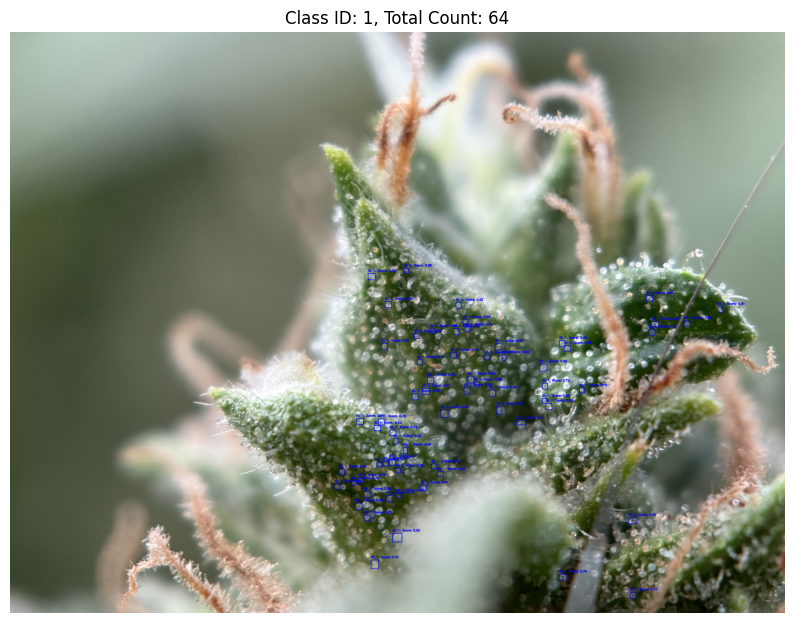

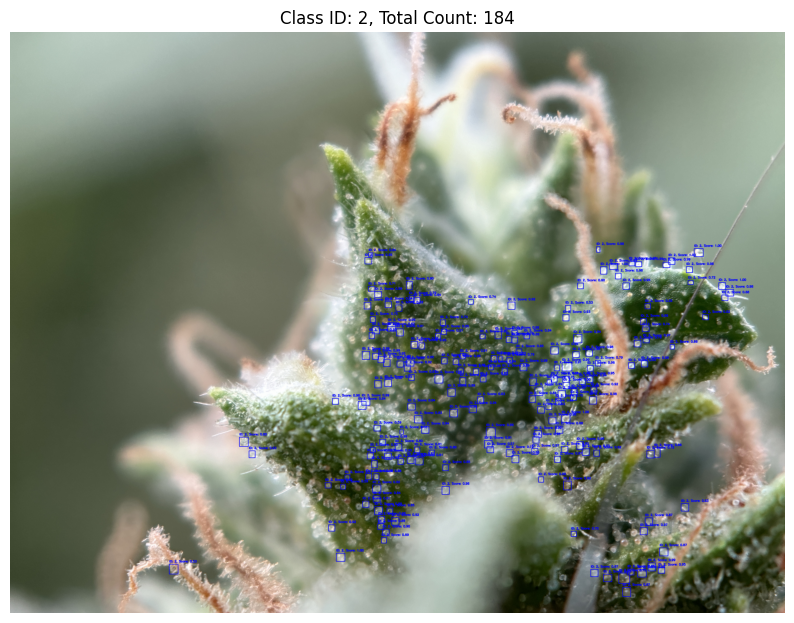

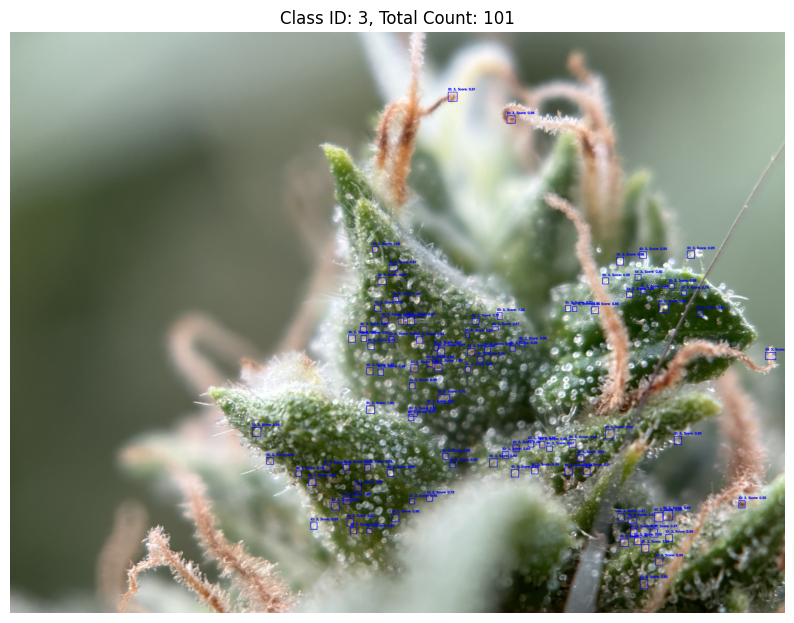

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Initialize a dictionary to hold images for each class
class_images = {}

# Initialize a dictionary to hold the counts for each class
class_counts = {}

# Read the original image
image = cv2.imread(raw_image_path)
if image is None:
    print("Could not read the image.")
else:
    # Create a copy of the image for each class
    for prediction in result.object_prediction_list:
        class_id = prediction.category.id
        if class_id not in class_images:
            class_images[class_id] = image.copy()
            class_counts[class_id] = 0

    # Iterate over the predictions
    for i in range(len(result.object_prediction_list)):
        prediction = result.object_prediction_list[i]
        class_id = prediction.category.id
        
        # Extract bounding box coordinates
        x_min = int(prediction.bbox.minx)
        y_min = int(prediction.bbox.miny)
        x_max = int(prediction.bbox.maxx)
        y_max = int(prediction.bbox.maxy)

        # Define color for the bounding box
        box_color = (255, 0, 0)  # Red color

        # Draw the bounding box on the class-specific image
        cv2.rectangle(class_images[class_id], (x_min, y_min), (x_max, y_max), box_color, 2)

        # Increment the count for the class
        class_counts[class_id] += 1

    # Plot the images for each class
    for class_id, img in class_images.items():
        # Convert BGR image to RGB for displaying with matplotlib
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(image_rgb)
        plt.title(f"Class ID: {class_id}, Total Count: {class_counts[class_id]}")
        plt.axis('off')
        plt.show()


## Classification with AlexNet  

In [18]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [22]:
classification_dataset_config = {
    'train': '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/trichome_dataset_01',
    'test': '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_01',
}

classification_model_config = {
    'model_name': 'alexnet',
    'model': models.alexnet,
}

# define train metrics
precision_macro_fastai = Precision(average='macro')
recall_macro_fastai = Recall(average='macro')
roc_auc_fastai = RocAuc()


# transformation and image space conversion
def custom_transform(size):
    return Resize(size, method='pad', pad_mode='zeros')

class RGB2HSV(Transform):
    def encodes(self, img: PILImage): 
        return rgb2hsv(img)
    
    
global_item_tfms=custom_transform(size=128),  # Resize and HSV transform
global_batch_tfms=[
    RGB2HSV(),
    *aug_transforms(size=128, flip_vert=True, max_rotate=10),
    Brightness(max_lighting=0.2, p=0.75),
    Contrast(max_lighting=0.2, p=0.75),
]

In [27]:
# save this model checkpoint
classification_models_path = "/home/etaylor/code_projects/thesis/checkpoints/image_classification_models"
model_path = f'{classification_models_path}/{classification_model_config["model_name"]}_model_12_7_24.pkl'
model.export(model_path)

In [28]:
# Load the model
learn = load_learner(model_path)

In [37]:
from fastai.vision.all import PILImage

# Path to the new image for inference
new_image_path = '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/trichome_dataset_01/clear/IMG_0001_trichome_6.png'

# Load the image
img = PILImage.create(new_image_path)

# Perform inference
pred_class, pred_idx, outputs = learn.predict(img)

# Print the results
print(f"Predicted Class: {pred_class}")
print(f"Prediction Index: {pred_idx}")
print(f"Outputs: {outputs}")


Predicted Class: clear
Prediction Index: 1
Outputs: tensor([2.5530e-04, 6.1381e-01, 3.8594e-01])


In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import load_learner, PILImage, Resize, Transform, aug_transforms, Brightness, Contrast, tensor, Image
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction
import os
import time

In [53]:
# Paths and model configurations
raw_image_path = "/home/etaylor/images/assessing_cannabis_experiment_images/day_5_2024_06_13/greenhouse/138/IMG_6652.JPG"
classification_model_path = '/home/etaylor/code_projects/thesis/checkpoints/image_classification_models/alexnet_model_12_7_24.pkl'
detection_model_path = "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth"
config_path = "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml"

# Define the mapping from classification model to object detection model
classification_to_detection_mapping = {
    0: 3,  # Amber (classification) -> Amber (object detection)
    1: 1,  # Clear (classification) -> Clear (object detection)
    2: 2   # Cloudy (classification) -> Cloudy (object detection)
}

In [ ]:

print("Loading detection model...")
detection_model = AutoDetectionModel.from_pretrained(
    model_type='detectron2',
    model_path=detection_model_path,
    config_path=config_path,
    confidence_threshold=0.5,
    image_size=512,
    device="cuda:0",  # or 'cpu'
)

print("Loading classification model...")
classification_model = load_learner(classification_model_path)

In [ ]:
# classification dataset transformations
# Define the custom transformations
def custom_transform(size):
    return Resize(size, method='pad', pad_mode='zeros')

class RGB2HSV(Transform):
    def encodes(self, img: PILImage):
        return rgb2hsv(np.array(img))

# Apply global transformations for inference
global_item_tfms = [custom_transform(size=128)]
global_batch_tfms = [
    RGB2HSV(),
    *aug_transforms(size=128, flip_vert=True, max_rotate=10),
    Brightness(max_lighting=0.2, p=0.75),
    Contrast(max_lighting=0.2, p=0.75),
]

In [ ]:
print("Performing object detection...")
start = time.time()
result = get_sliced_prediction(
    raw_image_path,
    detection_model,
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0,
    overlap_width_ratio=0,
    verbose=True,
)
end_time = time.time() - start
print(f"Time taken to for object detection model: {end_time}")

In [59]:
# Read the original image
image = cv2.imread(raw_image_path)

# initialize a time for the classification
start_classification = time.time()
# Iterate over detected objects and classify them
for i, prediction in enumerate(result.object_prediction_list):
    # print(f"Processing object {i+1}/{len(result.object_prediction_list)}...")
    # Extract bounding box coordinates
    x_min = int(prediction.bbox.minx)
    y_min = int(prediction.bbox.miny)
    x_max = int(prediction.bbox.maxx)
    y_max = int(prediction.bbox.maxy)

    # Crop the detected object from the original image
    cropped_image = image[y_min:y_max, x_min:x_max]
    
    # Plot the cropped bounding box image
    # plt.figure(figsize=(5, 5))
    # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.title("Cropped Bounding Box Image")
    # plt.show()

    # Convert the cropped image to PIL format for Fastai
    cropped_pil_image = PILImage.create(cropped_image)

    # Apply the same transformations as during training
    for item_tfms in global_item_tfms:
        cropped_pil_image = item_tfms(cropped_pil_image)

    # Convert the transformed image to a Fastai Image
    cropped_fastai_image = Image.fromarray(np.array(cropped_pil_image))

    # Perform classification on the cropped image
    pred_class, pred_idx, outputs = classification_model.predict(cropped_fastai_image)
    pred_idx = int(pred_idx)  # Convert tensor to int

    # Map the classification result to the detection model class
    detection_class = classification_to_detection_mapping[pred_idx]
    faster_rcnn_class_name = ["Clear", "Cloudy", "Amber"][prediction.category.id - 1]
    alexnet_class_name = ["Amber", "Clear", "Cloudy"][pred_idx]
    
    print(f"Detected Class (Faster R-CNN): {faster_rcnn_class_name}")
    print(f"Predicted Class (AlexNet): {alexnet_class_name}")
    
end = time.time() - start_classification
print(f"Time taken for classification: {end}")


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Clear
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Amber


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Cloudy
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Cloudy


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear


Detected Class (Faster R-CNN): Amber
Predicted Class (AlexNet): Clear
Time taken for classification: 8.952248811721802


In [47]:
detection_class

1